In [30]:
# 首先采用深度学习模型进行图片特征抽取
# 再用K-means对特征进行聚类

In [37]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import os
import time
import numpy as np
import pandas as pd
import pylab
import io
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [32]:
PATH = 'D:/download_By_Chome/data/acs_mosaic_2.0/JPGS/'
test_path='D:/download_By_Chome/data/acs_mosaic_2.0/test/'

In [33]:
base_model = VGG16(weights='imagenet', pooling='max',include_top=True)

def get_image_feature(path):

    model = base_model
#     print(model.summary())

    img = Image.open(path)
    #img = img.convert('RGB')
    img = img.resize((224,224), Image.NEAREST)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features[0]

t_0=time.time()

feature_ls = []
names = []
for name in os.listdir("D:/download_By_Chome/data/acs_mosaic_2.0/test"):

    features = get_image_feature(os.path.join("D:/download_By_Chome/data/acs_mosaic_2.0/test", name))
    #特征标准化
    vec = features/LA.norm(features)

    #print(name,"==", vec.tolist())
    names.append(name)
    feature_ls.append(vec.tolist())

t_1=time.time()
print('Get all of the features: {:.2f} sec\n'.format(t_1-t_0))

553467904/553467096 [==============================] - 30s 0us/step


C:\Users\LiYibo\AppData\Local\Temp\ipykernel_29392\903857100.py:10: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((224,224), Image.NEAREST)


Get all of the features: 91.90 sec



In [34]:
df = pd.DataFrame(feature_ls)
names_df = pd.DataFrame(names)
samples=df.values
kmeans=KMeans(n_clusters=3)
kmeans.fit(samples)#训练模型
labels=kmeans.predict(samples)#预测

t_2=time.time()
print('Fitting and predicting: {:.2f} sec\n'.format(t_2-t_1))

print(labels)       # 'test'目录下图像的索引

Fitting and predicting: 78.97 sec

[2 0 2 2 0 0 2 0 0 0 1 1 1 0 1 2 2 0 2 0 1 0 0 2 2 2 2 2 0 1 2 2 2 2 2 0 1
 2 2 1 1 2 1 1 2 1 2 0 1 2 2 2 2 1 1 0 2 2 2 1 1 2 2 2 2 0 2 2 2 0 1 0 0 2
 0 2 0 2 2 1 1 2 0 1 2 1 1 0 2 1 0 1 0 2 0 2 0 0 1 1 0 0 1 0 0 0 1 2 1 2 2
 0 0 0 1 2 0 2 1 2 1 0 2 0 2 2 1 1 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 2 0 0 2
 0 1 0 2 2 0 2 2 0 0 0 2 2 2 0 1 2 0 2 1 2 0 2 2 2 2 0 2 2 2 0 1 1 1 2 1 1
 2 1 1 0 1 2 1 2 1 1 1 2 2 2 0 2 1 0 1 2 2 2 1 0 0 0 2 2 0 0 1 1 1 1 1 0 2
 0 2 1 2 0 2 2 2 1 0 2 1 2 0 1 1 0 0 2 0 2 1 2 2 0 0 2 2 0 2 2 0 2 1 1 2 0
 1 2 2 1 2]


In [35]:
#names_df[labels==0]

In [36]:
#names_df

In [38]:
def picture_clustre(n):
    fig = plt.figure(figsize=(12,8),dpi=80)
    location_3= list(names_df[labels==n].iloc[:,0])        # 所有标签为3的图像名称
    # index=list(range(1,13))
    # for i,loc in index,location_0:
    i=1
    while i<29:
        ax=fig.add_subplot(3,7, i)
        lo=location_3[np.random.randint(1,len(location_3))]
        image=plt.imread(test_path+lo)
        ax.imshow(image,cmap='plasma')
        s=lo.split('_',)
        ax.set_title('{}\n{}'.format(s[1],s[2]))
        ax.axis('off')
        i+=1
    plt.show()

ValueError: num must be 1 <= num <= 21, not 22

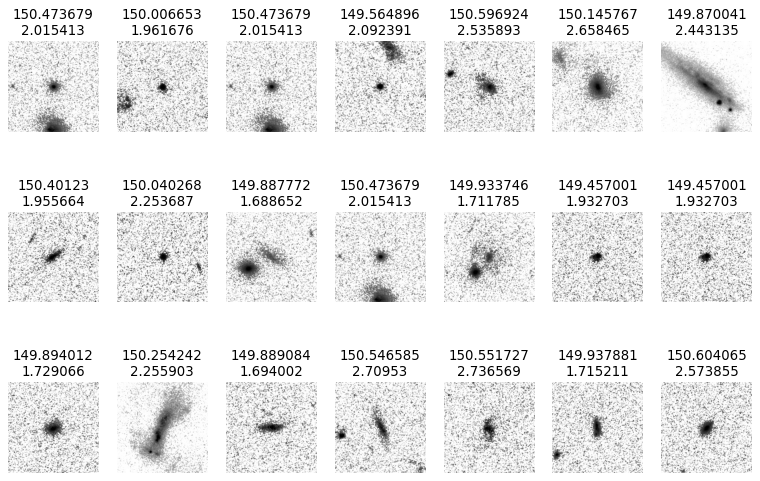

In [39]:
picture_clustre(0)

ValueError: num must be 1 <= num <= 21, not 22

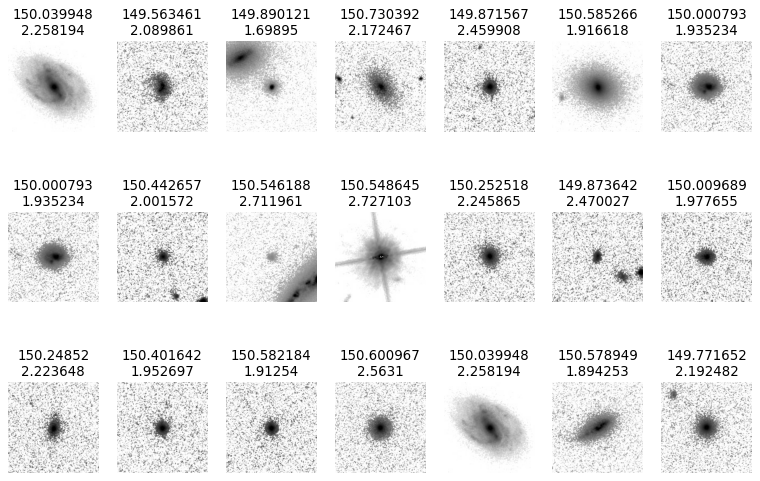

In [40]:
picture_clustre(1)

ValueError: num must be 1 <= num <= 21, not 22

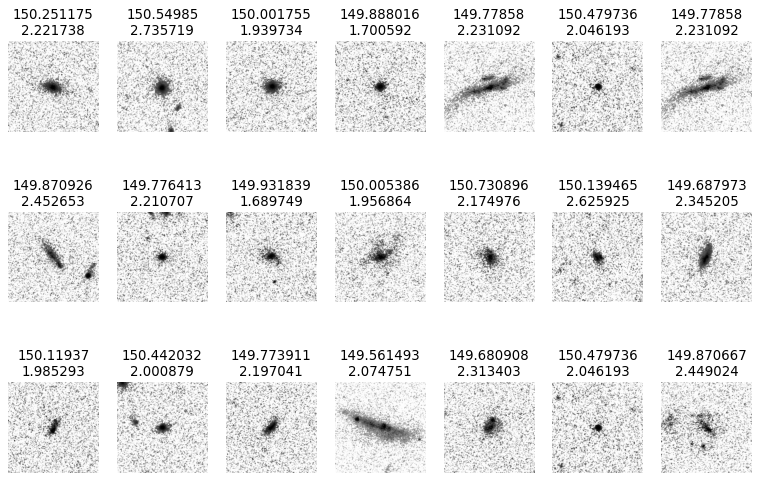

In [41]:
picture_clustre(2)